In [0]:
%tensorflow_version 2.x

import numpy as np
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras import models 
from tensorflow.keras import layers 

from tensorflow.keras.utils import to_categorical 
from tensorflow.keras.datasets import boston_housing

In [2]:
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

print(train_data.shape)
print(train_targets.shape)
print(f"Sample data: {train_data[0]}")
print(f"Sample price: {train_targets[0]}")

57344/57026 [==============================] - 0s 0us/step
(404, 13)
(404,)
Sample data: [  1.23247   0.        8.14      0.        0.538     6.142    91.7
   3.9769    4.      307.       21.      396.9      18.72   ]
Sample price: 15.2


In [7]:
train_mean = train_data.mean(axis=0)
train_std = train_data.std(axis=0)

test_mean = test_data.mean(axis=0)
test_std = test_data.std(axis=0)

# Center around 0 by substracting the mean
train_data_std = train_data - train_mean
test_data_std = test_data - test_mean

# Divide by the std to reduce variance
train_data_std /= train_std
test_data_std /= test_std

print(f"Sample data: {train_data[0]}")
print(f"Sample data standard: {train_data_std[0]}")

Sample data: [  1.23247   0.        8.14      0.        0.538     6.142    91.7
   3.9769    4.      307.       21.      396.9      18.72   ]
Sample data standard: [-0.27224633 -0.48361547 -0.43576161 -0.25683275 -0.1652266  -0.1764426
  0.81306188  0.1166983  -0.62624905 -0.59517003  1.14850044  0.44807713
  0.8252202 ]


In [0]:
def build_model():
  model = models.Sequential()
  model.add(layers.Dense(64, activation='relu', input_shape=(train_data_std.shape[1],)))
  model.add(layers.Dense(64, activation='relu'))

  model.add(layers.Dense(1))

  model.compile(optimizer='rmsprop', loss='mse', metrics=['mean_absolute_error'])

  return model

In [24]:
model = build_model()

history = model.fit(train_data_std, train_targets, validation_split=0.1, epochs=1000, verbose=0)

test_mse, test_mae = model.evaluate(test_data_std, test_targets)

print(f"MSE: {test_mse} MAE: {test_mae}")

4/4 [==============================] - 0s 2ms/step - loss: 34.9293 - mean_absolute_error: 2.6477
MSE: 34.92926788330078 MAE: 2.647651195526123


In [25]:
data_point =  np.random.uniform(low=-1, high=1, size=(13,))

prediction = model.predict(np.array([data_point]))

print(f"Data: {data_point} Prediction: {prediction}")

Data: [-0.45284181 -0.17068169 -0.59877115  0.08921812  0.09844669 -0.14067801
  0.21610982  0.73384378 -0.94309989  0.61958338 -0.12984594 -0.52047588
  0.6168557 ] Prediction: [[13.116743]]


dict_keys(['loss', 'mean_absolute_error', 'val_loss', 'val_mean_absolute_error'])


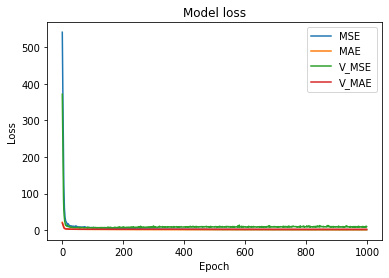

In [26]:
print(history.history.keys())

plt.plot(history.history['loss'])
plt.plot(history.history['mean_absolute_error'])

plt.plot(history.history['val_loss'])
plt.plot(history.history['val_mean_absolute_error'])

plt.title("Model loss")

plt.ylabel('Loss')
plt.xlabel('Epoch')

plt.legend(['MSE', 'MAE', 'V_MSE', 'V_MAE'], loc='upper right')
plt.show()